In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("C:/Users/shawx/OneDrive/Desktop/implementation/data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### There is Missing Values present in the Dataset.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### No Duplicates data is present in the Dataset.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
highest_fare = df[df['Fare'] == 512.3292].shape[0]
print('Number of people who paid the highest fare : ',highest_fare)

Number of people who paid the highest fare :  3


In [ ]:
zero_fare = df[df['Fare'] == 0].shape[0]
print('Number of people who paid zero for the fare : ',zero_fare)

Number of people who paid zero for the fare :  15


##### Observation :-
- Total 3 person has paid the highest fare of $512.33
- Total 15 person has has paid $0 for the fare.

In [ ]:
## Remove Unnecessary features from the Dataset.
cols_to_remove = ['Cabin', 'Ticket']
df = df.drop(columns=[col for col in cols_to_remove if col in df.columns])
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [ ]:
## Upadate Embarked Value.
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [ ]:
## Handling Missing Values.
df = df.dropna(subset=['Embarked'])

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

##### All the Missing Values are Handled.

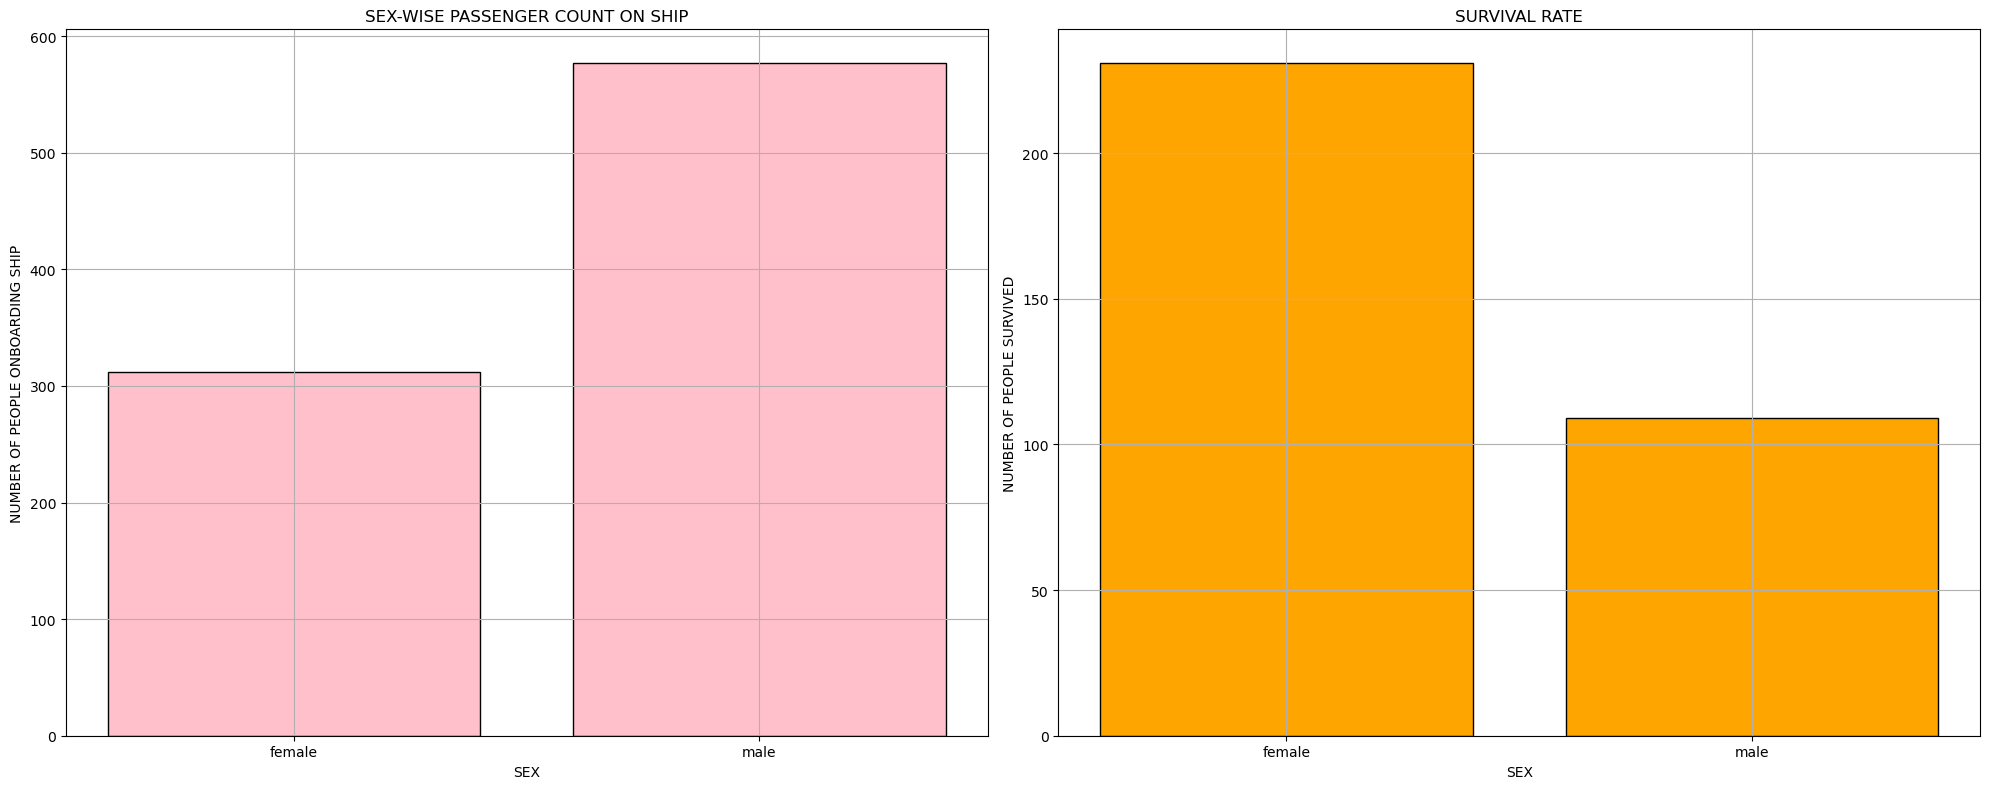

In [ ]:
## Data Visualization.
survivors = df.groupby('Sex')['Survived'].sum()
onboarding = df.groupby('Sex')['PassengerId'].count()

plt.figure(figsize=(20,8))

plt.subplot(121)
plt.bar(onboarding.index, onboarding.values, edgecolor='black', color='pink')
plt.title('SEX-WISE PASSENGER COUNT ON SHIP')
plt.xlabel('SEX')
plt.ylabel('NUMBER OF PEOPLE ONBOARDING SHIP')
plt.grid()
plt.tight_layout()

plt.subplot(122)
plt.bar(survivors.index, survivors.values, edgecolor='black', color='orange')
plt.title('SURVIVAL RATE')
plt.xlabel('SEX')
plt.ylabel('NUMBER OF PEOPLE SURVIVED')
plt.grid()
plt.tight_layout()

plt.show()

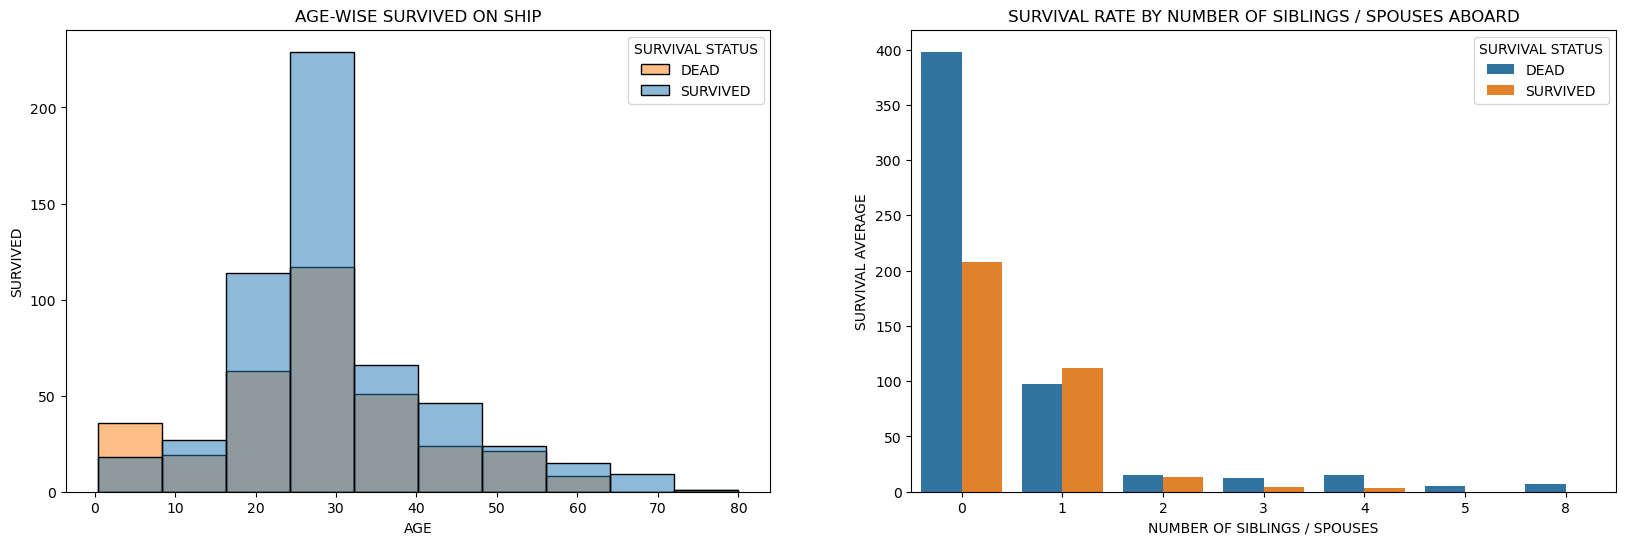

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(121)
ax = sns.histplot(x='Age', hue='Survived', data=df, bins=10)
ax.legend(title='SURVIVAL STATUS', labels=['DEAD', 'SURVIVED'])
plt.xlabel('AGE')
plt.ylabel('SURVIVED')
plt.title('AGE-WISE SURVIVED ON SHIP')

plt.subplot(122)
ax = sns.countplot(x='SibSp', hue='Survived', data=df)
ax.legend(title='SURVIVAL STATUS', labels=['DEAD', 'SURVIVED'])
plt.xlabel('NUMBER OF SIBLINGS / SPOUSES')
plt.ylabel('SURVIVAL AVERAGE')
plt.title('SURVIVAL RATE BY NUMBER OF SIBLINGS / SPOUSES ABOARD')
plt.show()

plt.show()

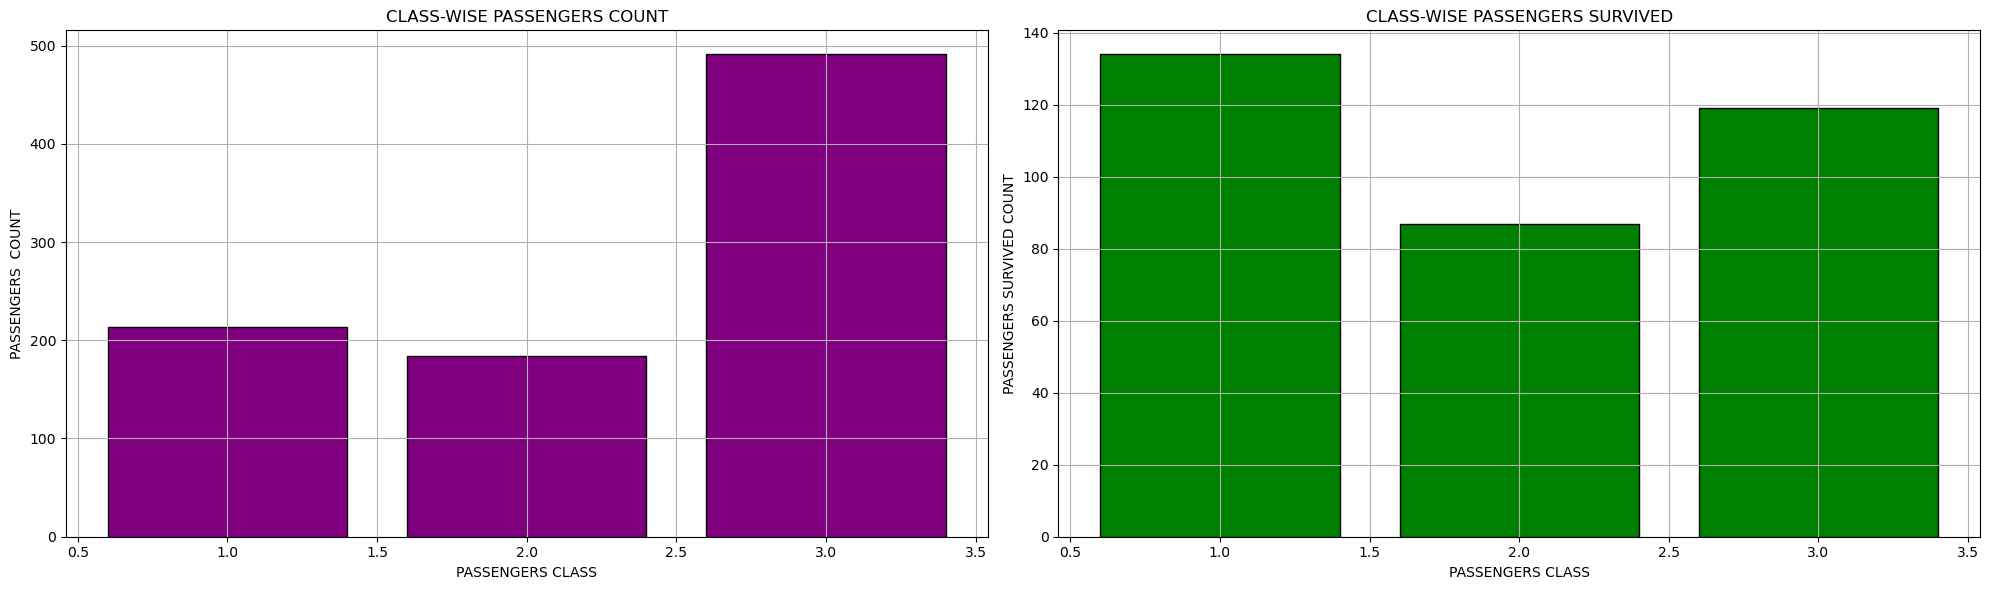

In [ ]:
class_wise_sur = df.groupby('Pclass')['Survived'].sum()
class_wise_Count = df.groupby('Pclass')['PassengerId'].count()

plt.figure(figsize=(20,6))

plt.subplot(121)
plt.bar(class_wise_Count.index, class_wise_Count.values, edgecolor='black', color='PURPLE')
plt.title('CLASS-WISE PASSENGERS COUNT')
plt.xlabel('PASSENGERS CLASS')
plt.ylabel('PASSENGERS  COUNT')
plt.grid()
plt.tight_layout()

plt.subplot(122)
plt.bar(class_wise_sur.index, class_wise_sur.values, edgecolor='black', color='green')
plt.title('CLASS-WISE PASSENGERS SURVIVED')
plt.xlabel('PASSENGERS CLASS')
plt.ylabel('PASSENGERS SURVIVED COUNT')
plt.grid()
plt.tight_layout()

plt.show()

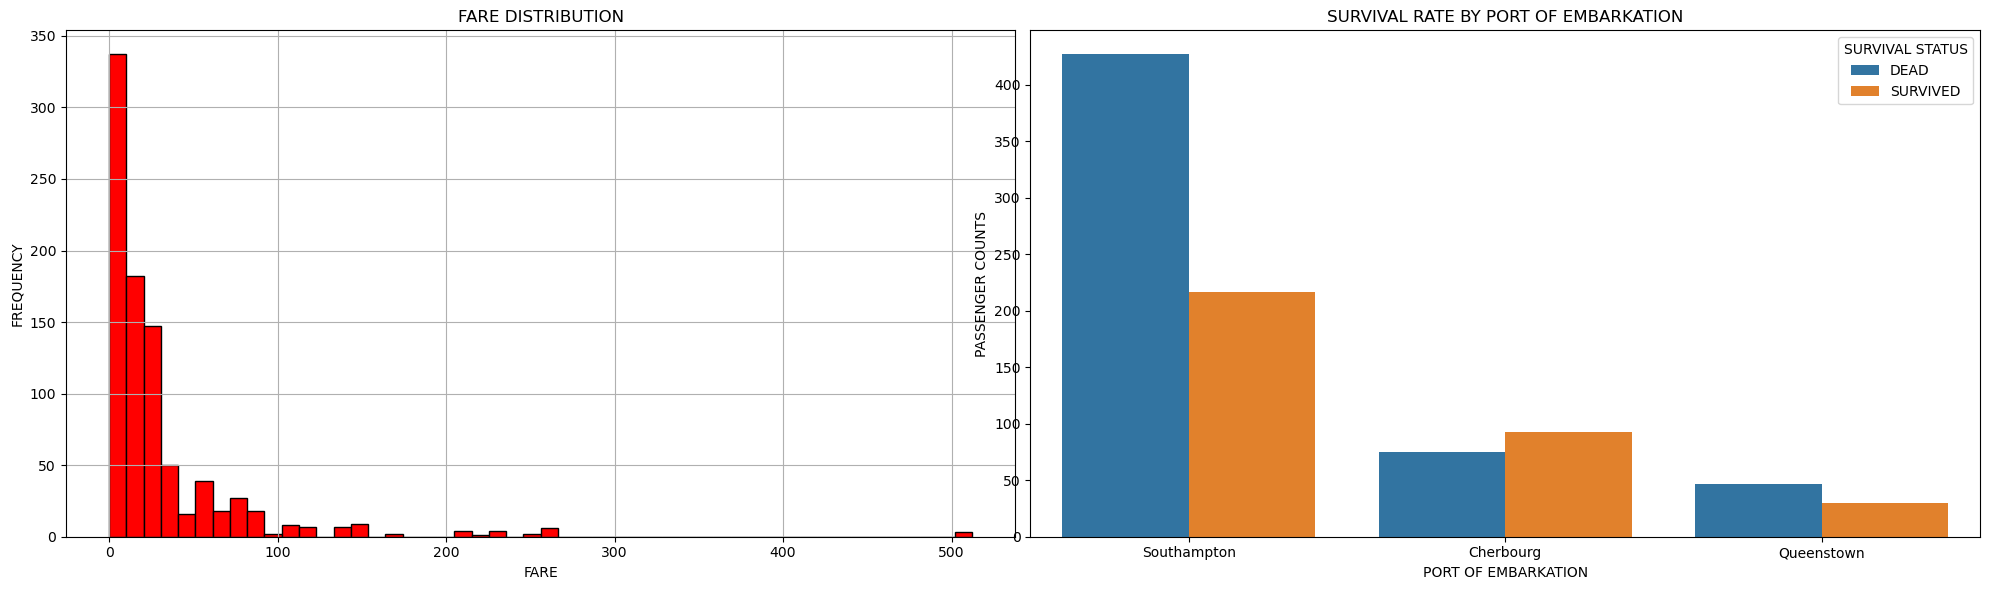

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.hist('Fare', data=df, edgecolor='black', color='red', bins=50)
plt.xlabel('FARE')
plt.ylabel('FREQUENCY')
plt.title('FARE DISTRIBUTION')
plt.grid()
plt.tight_layout()

plt.subplot(122)
ax = sns.countplot(x='Embarked', hue='Survived', data=df)
ax.legend(title='SURVIVAL STATUS', labels=['DEAD', 'SURVIVED'])
plt.xlabel('PORT OF EMBARKATION')
plt.ylabel('PASSENGER COUNTS')
plt.title('SURVIVAL RATE BY PORT OF EMBARKATION')

plt.show()

In [ ]:
corr = df.select_dtypes(include=['number']).corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


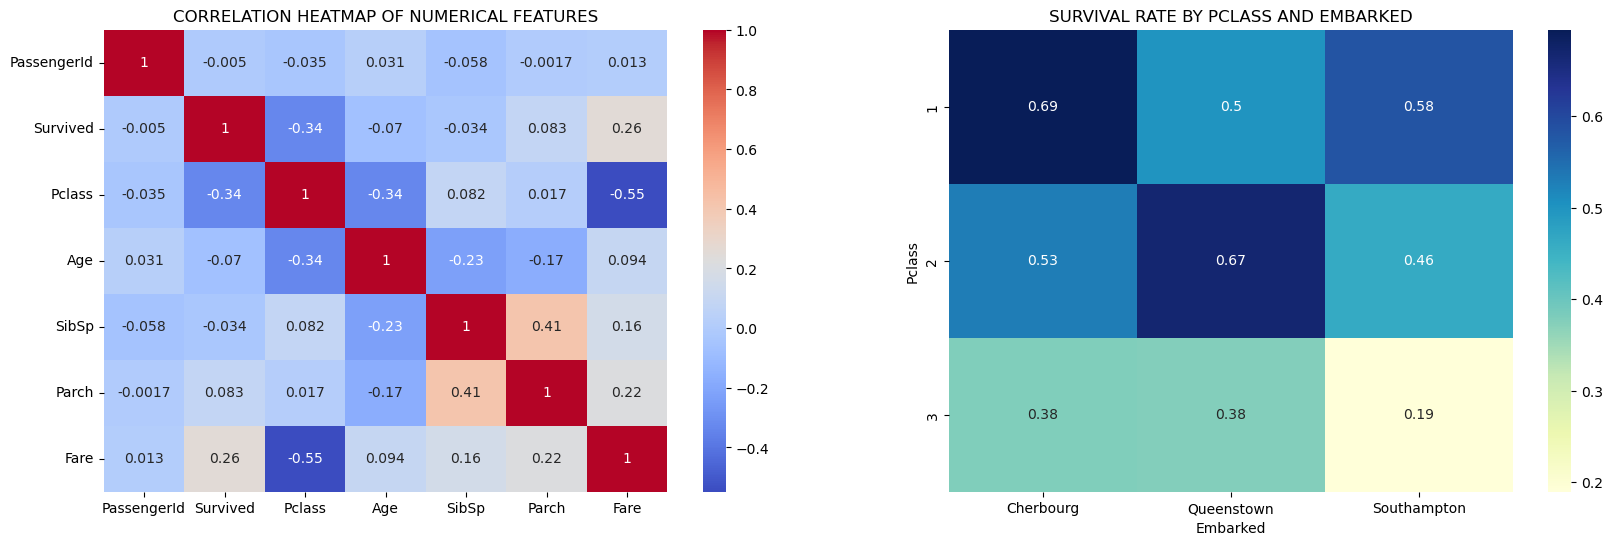

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('CORRELATION HEATMAP OF NUMERICAL FEATURES')

plt.subplot(122)
survival_rate = pd.crosstab(df['Pclass'], df['Embarked'], values=df['Survived'], aggfunc='mean')
sns.heatmap(survival_rate, annot=True, cmap='YlGnBu')
plt.title('SURVIVAL RATE BY PCLASS AND EMBARKED')

plt.show()

##### CONCLUSION :-
- Females had a significantly higher survival rate then males.
- First-class passengers had the highest survival rate, while the third-class had the lowest.
- Most passengers were young aduld, so their surviving rates are high.
- The average price of the ticket was $32.20.
- Passengers boarding at Cherbourg typically had the higest chance of survival as compared to Southampton and Queenstown.
- The person travelling with one sibling / spouse had the high chance of survival.
